# Study of pgm image

## Grey colors distribution
In this section we will explore the distribution of the grey colors in the image, it's necessary set the path of the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

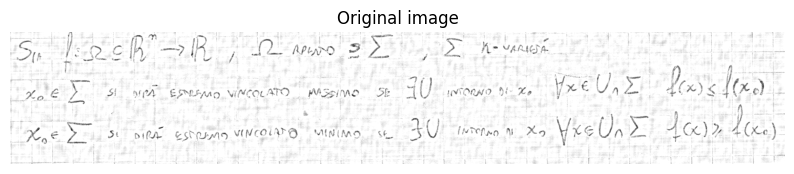

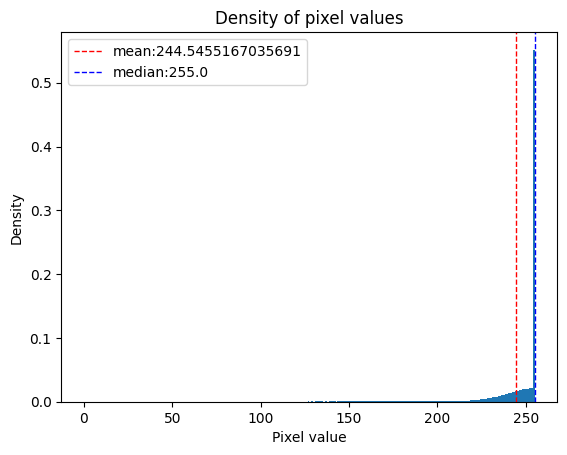

In [8]:
image_path = '../data/out/preprocessed/AnalMat2-1.pgm'  # path to the image

# Load the image
image = Image.open(image_path).convert('L')
image = np.array(image, dtype=int)

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

# Show a graph with density of pixel values
plt.figure()
plt.hist(image.flatten(), bins=256, range=(0, 255), density=True)
# Add a vertical red line with the mean value of the image
plt.axvline(x=np.mean(image), color='r', linestyle='dashed', linewidth=1, label=f'mean:{np.mean(image)}')
# Add a vertical blue line with the median value of the image
plt.axvline(x=np.median(image), color='b', linestyle='dashed', linewidth=1, label=f'median:{np.median(image)}')
plt.legend()

plt.title('Density of pixel values')
plt.xlabel('Pixel value')
plt.ylabel('Density')
plt.show()

Visualizzazione tridimensionale dell'immagine

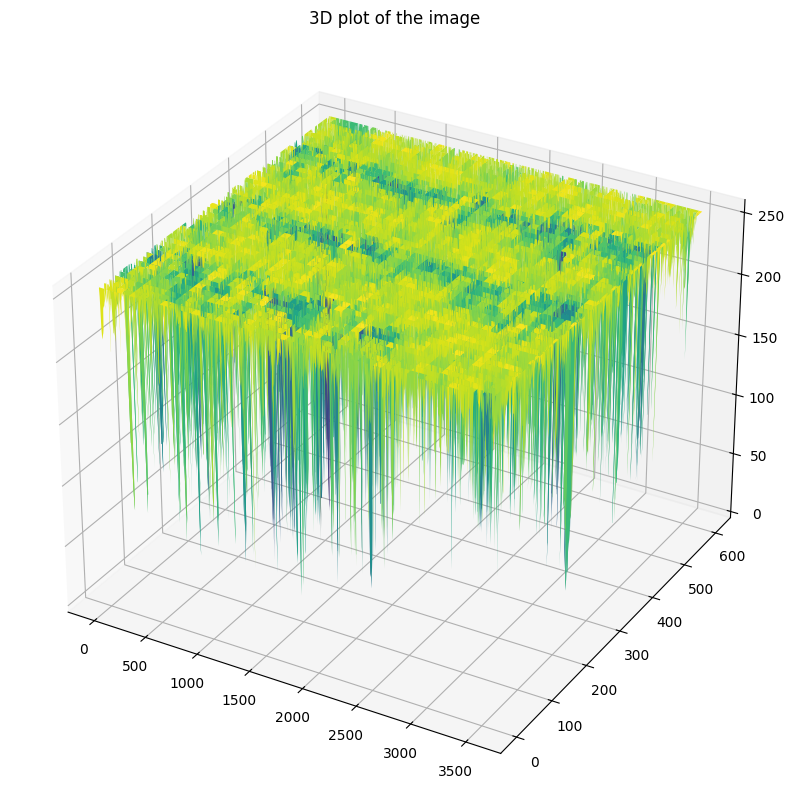

In [5]:
# fondamentalmente f(x,y)=image[x,y]
X, Y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
Z = image

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('3D plot of the image')
plt.show()

Visualizziamo i pixel al di sotto di un certo percentile.

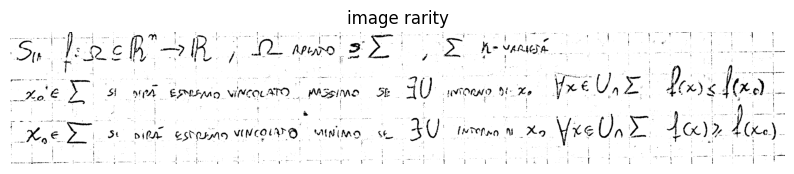

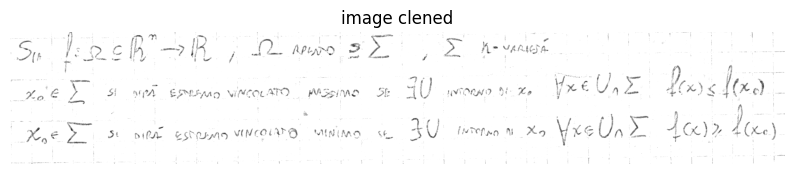

In [38]:
percentile = 0.05  # 5%

th = np.quantile(image, percentile)

image_cut = (image > th).astype(float)

plt.figure(figsize=(10,10))
plt.imshow(image_cut, cmap='gray', vmin=0, vmax=1)
plt.title('image rarity')
plt.axis('off')
plt.show()

# ora facciamo sì che qualsiasi cosa sopra percentile diventi bianca mentre se sta sotto rimane così com'è
new_image = 255 - (255 - image) * (image < th)

plt.figure(figsize=(10,10))
plt.imshow(new_image, cmap='gray')
plt.title('image clened')
plt.axis('off')
plt.show()
